### Business Problem:  
    
    UK Passenger movement data from UK to other Places the transport department 
    wants to forecast the number of passenger movement for next 3 years

##### Data = AirPassengers.csv

#### Objective 

    -Time Series Analysis
    -Exploratory data analysis on Time Series Data
    -Decomposition of time Series data( trend, seasonality, and residual)
    -Build ARIMA/SARIMA models and dorecast for next 3 years
    -Calculate time series accuracy by calculating RMSE and MAPE

In [1]:
import pandas as pd
import numpy as np

In [2]:
ts = pd.read_csv('AirPassengers.csv')

In [3]:
ts.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### Converting data into time serie data (i.e. data indexed by time)

###### If data is not indexed by time then it means data is not time serie data so it must be converted into time series data (set time as index).


In [5]:
ts.Month = pd.to_datetime(ts.Month)

In [6]:
ts.set_index('Month', drop = True, inplace = True)

In [7]:
ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


 Now  the data is time series as it is indexed with time

 Lets plot this time series data to understand the data in a better 
 
 with this we can understand following thins.
   
       - Presence of Trend(Positive trend or negative trend)
       - Presence of seasonality
       - Stationary 
       - cyclicity
       - Extreme values
         etc.

<AxesSubplot:xlabel='Month'>

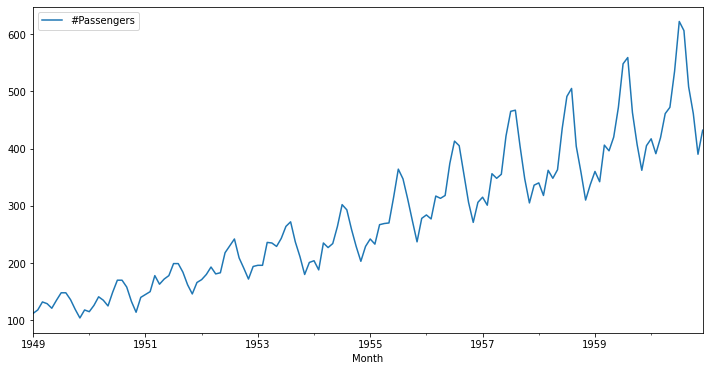

In [8]:
ts.plot(figsize = (12,6))

### Analysis of Seasonality Pattern 

In [9]:
monthly_data = pd.pivot_table(ts, values='#Passengers',
    index=ts.index.month,
    columns=ts.index.year,)

<AxesSubplot:xlabel='Month'>

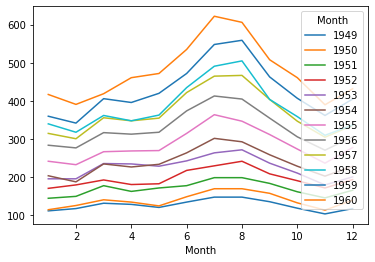

In [10]:
monthly_data.plot()

### Analysis of Trend in the data

<AxesSubplot:xlabel='Month'>

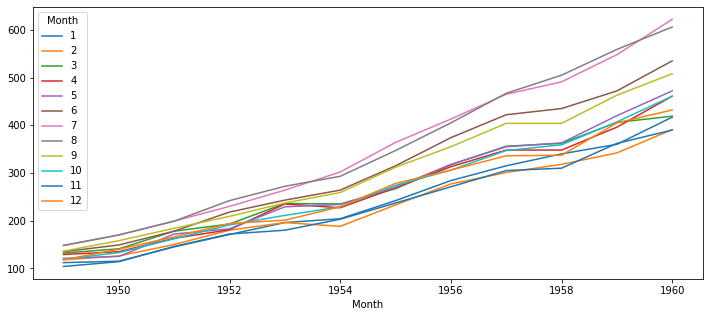

In [11]:
Trend = monthly_data.T
Trend.plot(figsize = (12,5))

### 2nd Method

In [12]:
ts1 = ts.copy()

In [13]:
ts1

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
import calendar

In [15]:
ts1['Month'] = ts.index.month

In [16]:
ts1

,#Passengers,Month
Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5
...,...,...
1960-08-01,606,8
1960-09-01,508,9
1960-10-01,461,10


In [17]:
ts1['Month'] = ts1['Month'].apply(lambda x: calendar.month_abbr[x])

In [18]:
ts1['year'] = ts1.index.year

In [19]:
ts1.head()

,#Passengers,Month,year
Month,,,
1949-01-01,112,Jan,1949
1949-02-01,118,Feb,1949
1949-03-01,132,Mar,1949
1949-04-01,129,Apr,1949
1949-05-01,121,May,1949


In [20]:
monthly_data = pd.pivot_table(ts1, values='#Passengers',
    index=ts1.Month,
    columns=ts1.year,)

<AxesSubplot:xlabel='Month'>

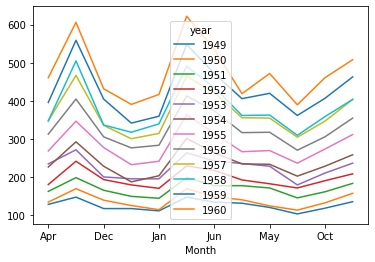

In [21]:
monthly_data.plot()

<AxesSubplot:xlabel='year'>

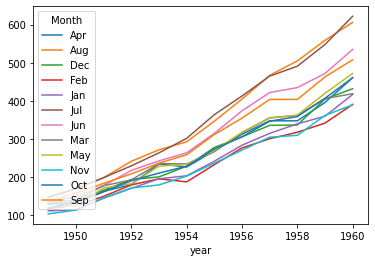

In [22]:
monthly_data.T.plot()

### Subplots 

 
As rolling window(months in moving average) is increasing,
it is smoothing the orange curve atlast we get trend out of the data


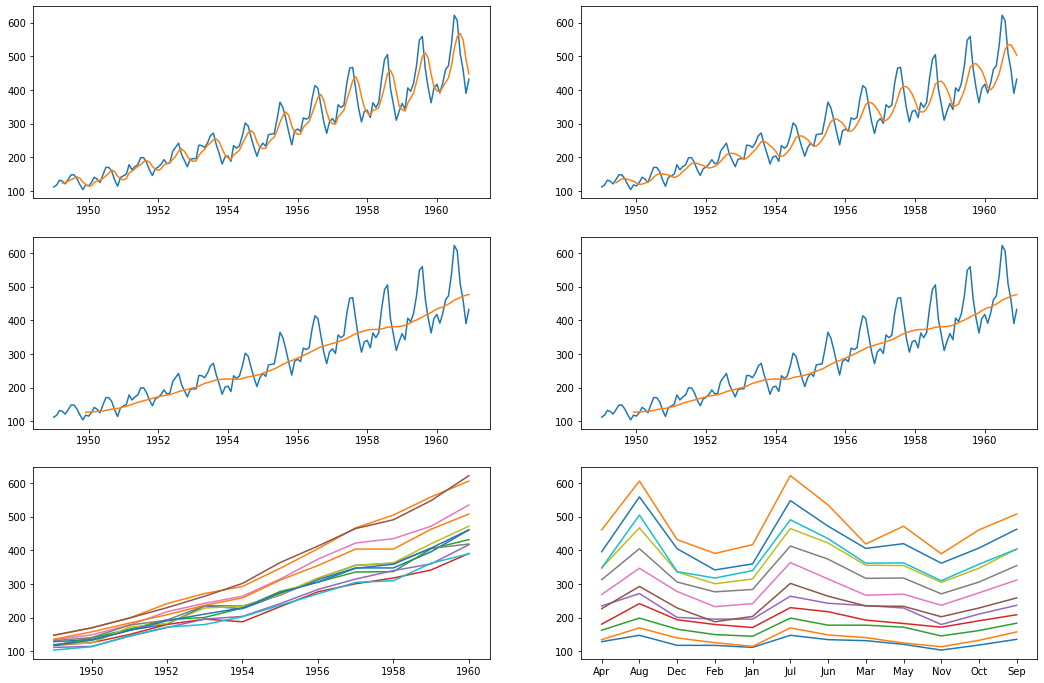

In [205]:
import matplotlib.pyplot as plt
# Subplots
fig, axes = plt.subplots(3, 2, sharey=False, sharex=False)
fig.set_figwidth(18)
fig.set_figheight(12)
axes[0][0].plot(ts.index, ts['#Passengers'])
axes[0][0].plot(ts.index, ts['#Passengers'].rolling(window=4).mean())

axes[0][1].plot(ts.index, ts['#Passengers'])
axes[0][1].plot(ts.index, ts['#Passengers'].rolling(window=6).mean())

axes[1][0].plot(ts.index, ts['#Passengers'])
axes[1][0].plot(ts.index, ts['#Passengers'].rolling(window=12).mean())

axes[1][1].plot(ts.index, ts['#Passengers'])
axes[1][1].plot(ts.index, ts['#Passengers'].rolling(window=12).mean())

axes[2][0].plot(monthly_data.T)

axes[2][1].plot(monthly_data);
print(' ')
print('''As rolling window(months in moving average) is increasing,
it is smoothing the orange curve atlast we get trend out of the data''')

# Decomposition

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [25]:
#Decomposition
# Trend + Seasonality + Irregular
# Trend*Seasonality*Irregular

ts_de = seasonal_decompose(ts, model='multiplicative')

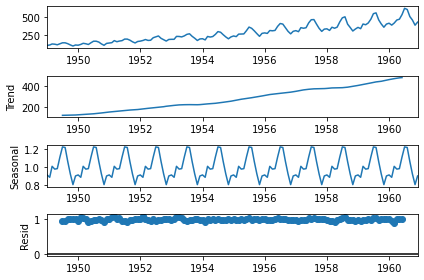

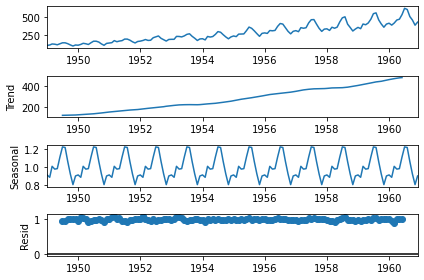

In [26]:
ts_de.plot()

In [27]:
ts_de.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [207]:
pd.concat([ts_de.trend,ts_de.seasonal,ts_de.resid,ts_de.observed],axis=1).head()

,trend,seasonal,resid,0
Month,,,,
1949-01-01,NaN,0.910230,NaN,112.0
1949-02-01,NaN,0.883625,NaN,118.0
1949-03-01,NaN,1.007366,NaN,132.0
1949-04-01,NaN,0.975906,NaN,129.0
1949-05-01,NaN,0.981378,NaN,121.0


In [29]:
ts_de.trend['1960-07-01':]

Month
1960-07-01   NaN
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, dtype: float64

# Using STL Method to decompose

In [30]:
import statsmodels.tsa.seasonal as stl

In [31]:
model = stl.STL(ts).fit()

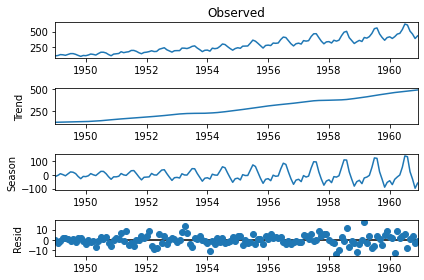

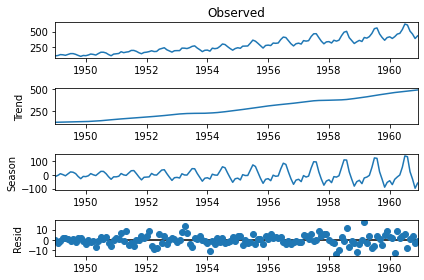

In [32]:
model.plot()

In [33]:
decompose_data = pd.concat([model.trend, model.seasonal, model.resid, model.observed],axis=1)
decompose_data.columns = ['Trend', 'SI', "Irregular", "Actual"]

In [34]:
decompose_data.head()

,Trend,SI,Irregular,Actual
Month,,,,
1949-01-01,122.873832,-11.096122,0.222291,112
1949-02-01,123.576178,-2.887879,-2.688298,118
1949-03-01,124.266269,8.838384,-1.104653,132
1949-04-01,124.946210,2.066623,1.987167,129
1949-05-01,125.620462,-6.423068,1.802606,121


In [35]:
prediction = decompose_data.shift(1)
prediction

,Trend,SI,Irregular,Actual
Month,,,,
1949-01-01,NaN,NaN,NaN,NaN
1949-02-01,122.873832,-11.096122,0.222291,112.0
1949-03-01,123.576178,-2.887879,-2.688298,118.0
1949-04-01,124.266269,8.838384,-1.104653,132.0
1949-05-01,124.946210,2.066623,1.987167,129.0
...,...,...,...,...
1960-08-01,477.593457,139.105278,5.301266,622.0
1960-09-01,480.864519,133.207255,-8.071775,606.0
1960-10-01,484.113614,23.336156,0.550230,508.0


In [36]:
print('MAPE =',np.mean(np.abs((decompose_data.Actual-prediction.Actual)/decompose_data.Actual)))

MAPE = 0.09019447701311428


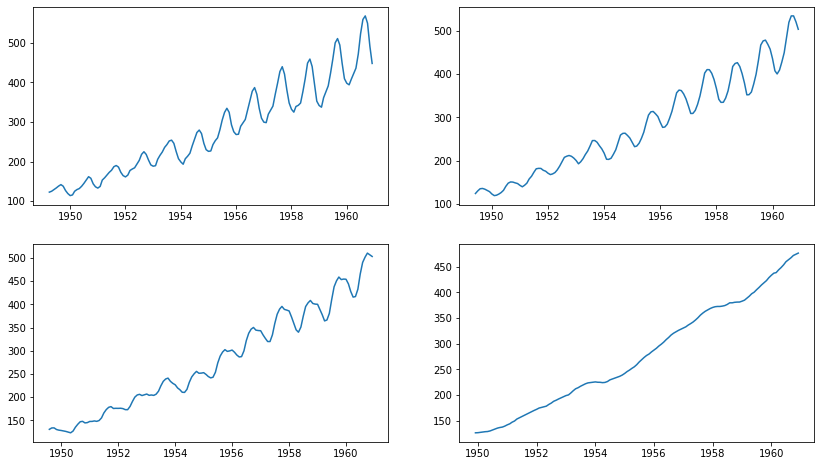

In [37]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(ts.index, ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][1].plot(ts.index, ts.rolling(window=6).mean(), label='4-Months Rolling Mean')
axes[1][0].plot(ts.index, ts.rolling(window=8).mean(), label='4-Months Rolling Mean')
axes[1][1].plot(ts.index, ts.rolling(window=12).mean(), label='4-Months Rolling Mean')

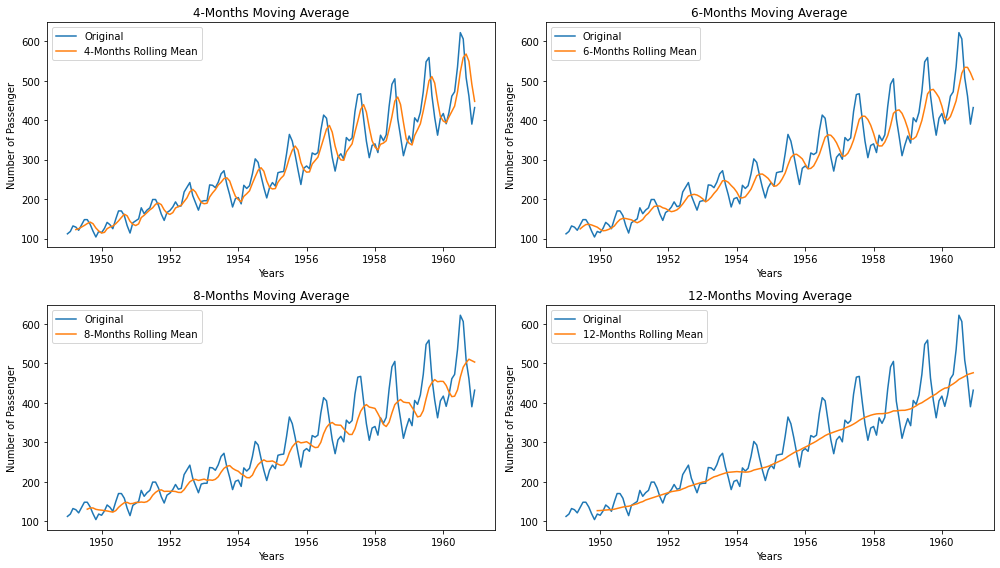

In [38]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(ts.index, ts, label='Original')
axes[0][0].plot(ts.index, ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Passenger")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(ts.index, ts, label='Original')
axes[0][1].plot(ts.index, ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Passenger")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(ts.index, ts, label='Original')
axes[1][0].plot(ts.index, ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Passenger")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(ts.index, ts, label='Original')
axes[1][1].plot(ts.index, ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Passenger")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

# ETS Models

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [40]:
train = ts['1949-01-01':'1958-01-01']
test = ts['1958-02-01':]

In [41]:
#parameters alpha, beta, gamma

# our guessed parameters
alpha = 0.35
beta = 0.25
gamma = 0.1

ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_model = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# VVVVVi    if trend and seasonality both are present in the data then we will use , mul = multiplicative, 
#           And  seasonal_periods = time duration in which seasonality is reapeting.

C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [42]:
fcast_test = ets_model.forecast(steps=35)
fcast_test.head()

1958-02-01    342.860402
1958-03-01    398.529108
1958-04-01    388.126717
1958-05-01    389.445605
1958-06-01    443.668080
Freq: MS, dtype: float64

In [43]:
act_test = test['#Passengers']

In [44]:
print('MAPE =',np.mean(np.abs(act_test-fcast_test)/act_test))

MAPE = 0.06303080885546325


In [45]:
# Fitted Values

In [46]:
pred = ets_model.fittedvalues['1949-01-01':'1958-01-01']

In [47]:
pred

Month
1949-01-01    114.181783
1949-02-01    110.152760
1949-03-01    131.673597
1949-04-01    128.627077
1949-05-01    129.024541
                 ...    
1957-09-01    408.109023
1957-10-01    357.532112
1957-11-01    311.041566
1957-12-01    351.666984
1958-01-01    353.110811
Length: 109, dtype: float64

In [48]:
train = train['#Passengers']

In [49]:
print('MAPE Fitted values',np.mean(np.abs((train-pred)/train)))

MAPE Fitted values 0.03303395342205979


# Function to get the best value of  alpha,beta ,gamma value

In [50]:
import auto_holtwinters_UDF

In [51]:
auto_holtwinters_UDF.auto_hwm(ts, val_split_date = '1958-02-01', alpha = [0.1,0.3,0.5,0.6,0.8], beta = [0.1,0.3,0.5,0.6,0.8], gamma = [0.1,0.3,0.5,0.6,0.8], trend='mul', seasonal='mul', periods=12, verbose=True)

Evaluating Exponential Smoothing model for 125 fits

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.1, 'phi': None}


C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWa

Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.8, 'phi': None}


C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWa

Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.1, 'phi': None}


C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWa

Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.3, 'phi': None}


C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: Runtim

Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.1, 'phi': None}


C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWa

Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.6, 'phi': None}


C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWa

Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.6, 'phi': None}


C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWa

Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma'

C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWa

Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.8, 'phi': None}


C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWa

Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma'

C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWa

Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.1, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.8, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.1, 'phi': None}


C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWa

Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.3, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.5, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.6, 'phi': None}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.8, 'phi': None}


C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWa

{'alpha': 0.3,
 'beta': 0.3,
 'gamma': 0.6,
 'phi': None,
 'mae': array(0.02784808)}

In [52]:
# best Value of  Alpha,beta,gamma value

# our guessed parameters  
alpha = 0.3
beta = 0.3
gamma = 0.6

# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)



C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [53]:
fcast = ets_fit.forecast(steps=35)

fcast.head()

1958-02-01    331.406333
1958-03-01    386.217611
1958-04-01    376.963214
1958-05-01    383.668197
1958-06-01    452.827496
Freq: MS, dtype: float64

In [54]:
print('MAPE for actual test and forcasted test : ', np.mean(np.abs(test['#Passengers'] - fcast)/test['#Passengers']))

MAPE for actual test and forcasted test :  0.0547534984490555


# ARIMA/SARIMA models

# Check for Stationary

In [71]:
import statsmodels.tsa.api as smt

In [72]:
adfuller(ts)

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [73]:
adfuller(np.log(ts))

(-1.7170170891069714,
 0.4223667747703857,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

In [74]:
adfuller(np.log(ts).diff(1).dropna())

(-2.717130598388145,
 0.0711205481508568,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

In [75]:
adfuller(np.log(ts).diff(2).dropna())

(-3.1679073752887454,
 0.021919114564038708,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -431.93712963284486)

### now the data is Stationary( i.e. constant variance and  mean)

<AxesSubplot:xlabel='Month'>

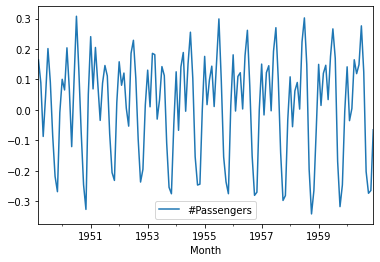

In [76]:
np.log(ts).diff(2).dropna().plot()

<AxesSubplot:xlabel='Month'>

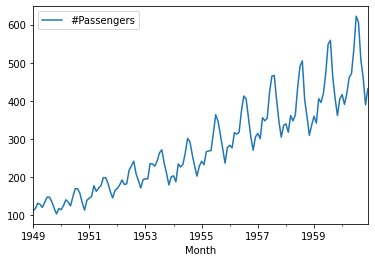

In [77]:
ts.plot()

##### Since there is seasonality in the data it means we need to use SARIMA

# ACF(q)  And PACF(p) Plot to find p and q values

In [80]:
ln_ts1_diff2 = np.log(ts).diff(2).dropna()

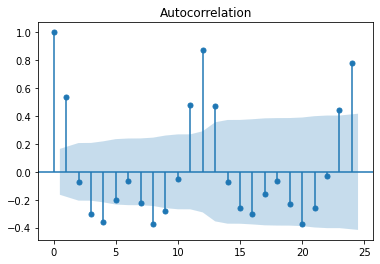

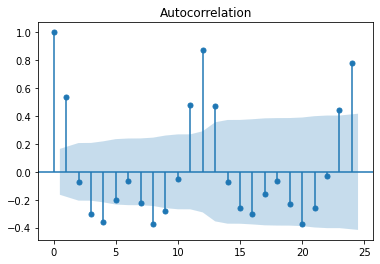

In [81]:
#how to find p, q values
# Functions ACF, PACF

smt.graphics.plot_acf(ln_ts1_diff2, lags=24)

#uses of plot
#1. Model is possible or not. with atleast one lag, you should have correlaiton
#2. Data having seasonaolity or not - SARIMA
#3. We can identify q value = after which lag (first time), the auto correlation is close to zero or crossing zero

In [ ]:
#### 

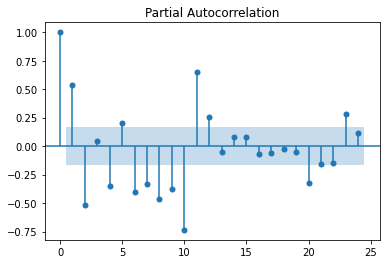

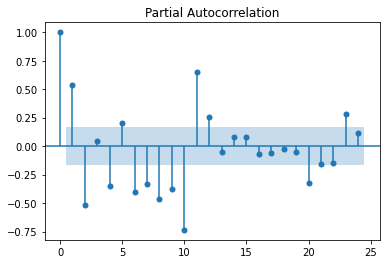

In [82]:
smt.graphics.plot_pacf(ln_ts1_diff2, lags = 24, method = 'ols')

### q = 1, p = 1, d = 2

In [83]:
import statsmodels.api as sm

In [107]:
model = sm.tsa.statespace.SARIMAX(np.log(ts)[:'1958-01-01'], order = (1,2,1), seasonal_order= (1,2,1,12),
                           enforce_stationarity=False,
                           enforce_invertibility=False).fit()

C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\kumar Rohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [108]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  109
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 12)   Log Likelihood                 110.710
Date:                            Fri, 16 Jul 2021   AIC                           -211.421
Time:                                    00:20:18   BIC                           -200.250
Sample:                                01-01-1949   HQIC                          -206.989
                                     - 01-01-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3896      0.109     -3.578      0.000      -0.603      -0.176
ma.L1         -1.0002     26.327   

In [111]:
tcast = np.exp(model.forecast(steps = 36))

In [112]:
act = ts['#Passengers']['1958-02-01':]

In [122]:
print('MAPE:-', np.mean(np.abs((act-fcast)/act)))

MAPE:- 0.0547534984490555


In [123]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [125]:
best_results = auto_arima(np.log(ts)[:'1958-01-01'],  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 3), D=range(0, 2), Q=range(0, 3))

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:-122.9908658178516
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:-153.9875836909283
SARIMAX(0, 2, 0)x(0, 0, 2, 12)12 - AIC:-144.1172408325932
SARIMAX(0, 2, 0)x(0, 1, 0, 12)12 - AIC:-211.32605859669653
SARIMAX(0, 2, 0)x(0, 1, 1, 12)12 - AIC:-208.90235345750355
SARIMAX(0, 2, 0)x(0, 1, 2, 12)12 - AIC:3093.680646472202
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:-219.7366398247109
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:-238.71157176576511
SARIMAX(0, 2, 0)x(1, 0, 2, 12)12 - AIC:-201.44441844693807
SARIMAX(0, 2, 0)x(1, 1, 0, 12)12 - AIC:-197.36005750222816
SARIMAX(0, 2, 0)x(1, 1, 1, 12)12 - AIC:-206.03658682670365
SARIMAX(0, 2, 0)x(1, 1, 2, 12)12 - AIC:2963.4831087915927
SARIMAX(0, 2, 0)x(2, 0, 0, 12)12 - AIC:-200.24078069266656
SARIMAX(0, 2, 0)x(2, 0, 1, 12)12 - AIC:-205.3416691780421
SARIMAX(0, 2, 0)x(2, 0, 2, 12)12 - AIC:-202.28470859939475
SARIMAX(0, 2, 0)x(2, 1, 0, 12)12 - AIC:-195.34139368834428
SARIMAX(0, 2, 0)x(2, 1, 1, 12)12 - AIC:-199.29903230454673
SARIM

SARIMAX(2, 2, 1)x(2, 1, 0, 12)12 - AIC:-246.39622029519205
SARIMAX(2, 2, 1)x(2, 1, 1, 12)12 - AIC:-244.68010706770968
SARIMAX(2, 2, 1)x(2, 1, 2, 12)12 - AIC:nan
SARIMAX(2, 2, 2)x(0, 0, 0, 12)12 - AIC:-169.2346337988752
SARIMAX(2, 2, 2)x(0, 0, 1, 12)12 - AIC:-207.9978212460405
SARIMAX(2, 2, 2)x(0, 0, 2, 12)12 - AIC:-166.59075302982797
SARIMAX(2, 2, 2)x(0, 1, 0, 12)12 - AIC:-295.5010006207687
SARIMAX(2, 2, 2)x(0, 1, 1, 12)12 - AIC:-286.3128794438091
SARIMAX(2, 2, 2)x(0, 1, 2, 12)12 - AIC:2623.3682849341303
SARIMAX(2, 2, 2)x(1, 0, 0, 12)12 - AIC:-299.29116526669765
SARIMAX(2, 2, 2)x(1, 0, 1, 12)12 - AIC:-317.21000277885065
SARIMAX(2, 2, 2)x(1, 0, 2, 12)12 - AIC:-273.5869919151688
SARIMAX(2, 2, 2)x(1, 1, 0, 12)12 - AIC:-280.1504327135095
SARIMAX(2, 2, 2)x(1, 1, 1, 12)12 - AIC:-282.5199738574607
SARIMAX(2, 2, 2)x(1, 1, 2, 12)12 - AIC:2663.7261737708445
SARIMAX(2, 2, 2)x(2, 0, 0, 12)12 - AIC:-283.7129322565644
SARIMAX(2, 2, 2)x(2, 0, 1, 12)12 - AIC:-283.0940942371121
SARIMAX(2, 2, 2)x(2, 0, 

In [126]:


model = sm.tsa.statespace.SARIMAX(np.log(ts)[:'1958-01-01'], order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  109
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 167.536
Date:                            Fri, 16 Jul 2021   AIC                           -325.072
Time:                                    00:32:57   BIC                           -312.409
Sample:                                01-01-1949   HQIC                          -319.959
                                     - 01-01-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3269      0.082     -3.976      0.000      -0.488      -0.166
ma.L1         -1.0000    192.974   

In [166]:
fcast = np.exp(model.forecast(36))
fcast

1958-02-01    330.551594
1958-03-01    386.291763
1958-04-01    379.129312
1958-05-01    384.112259
1958-06-01    448.466115
1958-07-01    498.929565
1958-08-01    494.139737
1958-09-01    432.885964
1958-10-01    375.360789
1958-11-01    329.407978
1958-12-01    370.695448
1959-01-01    378.678854
1959-02-01    366.939705
1959-03-01    429.392492
1959-04-01    421.222873
1959-05-01    426.774862
1959-06-01    498.418269
1959-07-01    554.612645
1959-08-01    549.212056
1959-09-01    480.903894
1959-10-01    416.787966
1959-11-01    365.591854
1959-12-01    411.504452
1960-01-01    420.346035
1960-02-01    407.235630
1960-03-01    476.702455
1960-04-01    467.557264
1960-05-01    473.685873
1960-06-01    553.382019
1960-07-01    615.888707
1960-08-01    609.808932
1960-09-01    533.710084
1960-10-01    462.320699
1960-11-01    405.340674
1960-12-01    456.345090
1961-01-01    466.127096
Freq: MS, dtype: float64

In [167]:
act = ts['#Passengers']['1958-02-01':]

# MAPE

In [168]:
print('MAPE:-', np.mean(np.abs((act-fcast)/act)))

MAPE:- 0.04124732312086105


# RMSE

In [211]:
print('RMSE:-', np.sqrt(np.mean(np.square(act-fcast))))

RMSE:- 20.127181584117224


In [169]:
import matplotlib.pyplot as plt

In [171]:
# Another way to create subplot

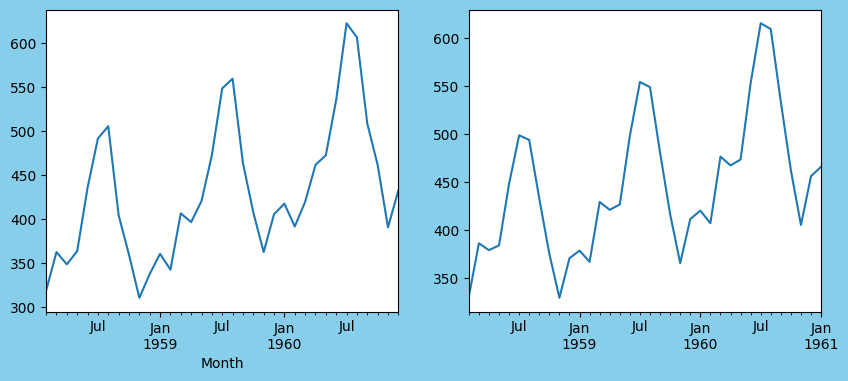

In [175]:
fig = plt.figure(figsize = (10,4),dpi =100,facecolor = "skyblue")
plt.subplot(1,2,1)
ts['#Passengers']['1958-02-01':].plot()
plt.subplot(1,2,2)
fcast.plot();

 blue dotted line plot is past data and Orange line plot is forecasted data


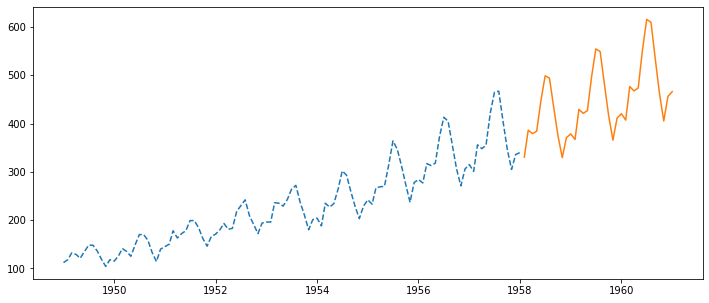

In [196]:
plt.figure(figsize = (12,5))
plt.plot(ts[:'1958-01-01'], '--', label='obs')
plt.plot(fcast, '-', label=fcast);

print(' blue dotted line plot is past data and Orange line plot is forecasted data')

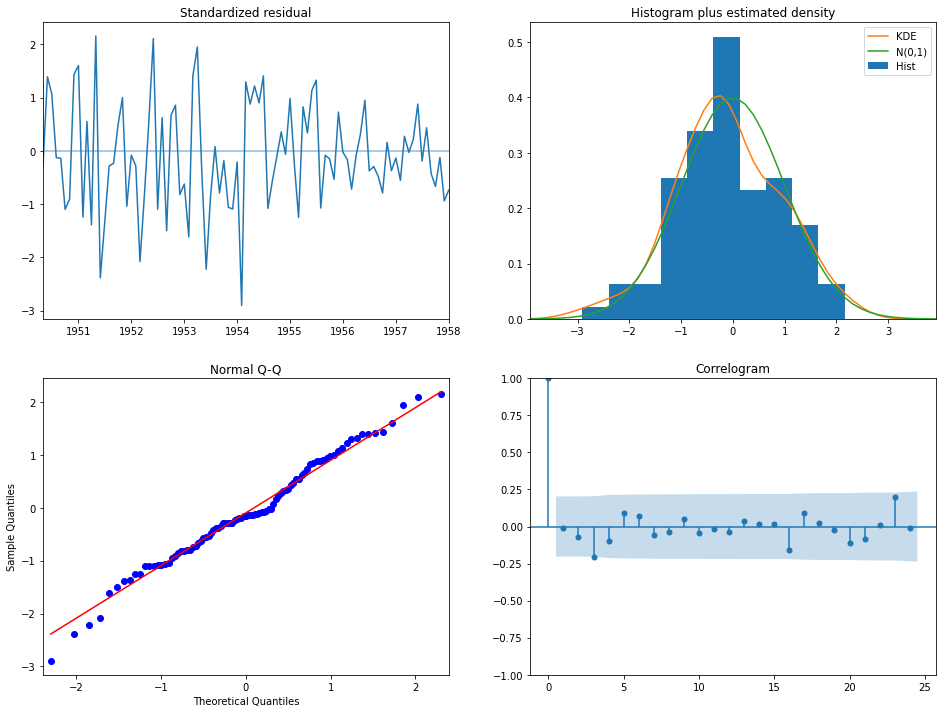

In [193]:
model.plot_diagnostics(lags=24, figsize=(16,12));